# **Spotify Top-hits :**

### **Importing Libraries:**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("songs_normalize.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
df.shape

(2000, 18)

### **Data Cleaning**

As we can see, we do not have any NA values.

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014], dtype=int64)

We can also see that there are more years as we expected. So, we would remove all data except for the years 2000-2019.

In [6]:
filter_criteria = ((df["year"] == 1998) |
                   (df["year"] == 1999) |
                   (df["year"] == 2020))
drope = df.loc[filter_criteria].index

In [7]:
df.drop(drope, inplace = True)

In [8]:
df.shape

(1958, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1999
Data columns (total 18 columns):
artist              1958 non-null object
song                1958 non-null object
duration_ms         1958 non-null int64
explicit            1958 non-null bool
year                1958 non-null int64
popularity          1958 non-null int64
danceability        1958 non-null float64
energy              1958 non-null float64
key                 1958 non-null int64
loudness            1958 non-null float64
mode                1958 non-null int64
speechiness         1958 non-null float64
acousticness        1958 non-null float64
instrumentalness    1958 non-null float64
liveness            1958 non-null float64
valence             1958 non-null float64
tempo               1958 non-null float64
genre               1958 non-null object
dtypes: bool(1), float64(9), int64(5), object(3)
memory usage: 277.3+ KB


In [10]:
df.dtypes.value_counts()

float64    9
int64      5
object     3
bool       1
dtype: int64

In [11]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,228294.167518,2009.687436,59.805414,0.667258,0.720057,5.387640,-5.502172,0.554137,0.104174,0.128534,0.015371,0.181406,0.551287,120.080067
std,39006.575187,5.715210,21.511567,0.140353,0.152390,3.610776,1.925689,0.497188,0.096524,0.173719,0.088407,0.140584,0.220393,26.962314
min,113000.000000,2000.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203422.750000,2005.000000,56.000000,0.581000,0.624000,2.000000,-6.481000,0.000000,0.039700,0.014000,0.000000,0.088600,0.386250,98.592000
50%,223059.500000,2010.000000,66.000000,0.676000,0.736000,6.000000,-5.279500,1.000000,0.060850,0.055300,0.000000,0.124000,0.557000,120.020500
75%,247376.250000,2015.000000,73.000000,0.763750,0.837000,8.000000,-4.166250,1.000000,0.131000,0.176000,0.000064,0.241000,0.729750,134.147250
max,484146.000000,2019.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## **Variable Description:**
* **artist**: Name of the Artist.
* **song**: Name of the Track.
* **duration_ms**: Duration of the track in milliseconds.
* **explicit**: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
* **year**: Release Year of the track.
* **popularity**: The higher the value the more popular the song is.
* **danceability**: Danceability describes how suitable a track is for dancing.
* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **loudness**:  Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
* **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
* **speechiness**: Speechiness detects the presence of spoken words in a track. 
* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
* **instrumentalness**: Predicts whether a track contains no vocals.
* **liveness**: Detects the presence of an audience in the recording.
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **genre**: Genre of the track.

## **Categorical Variables**

In [12]:
c_v = df.dtypes == "object"
print(c_v[c_v].index)

Index(['artist', 'song', 'genre'], dtype='object')


### **Genre**

In [13]:
print(df["genre"].value_counts())

pop                                      416
hip hop, pop                             275
hip hop, pop, R&B                        240
pop, Dance/Electronic                    219
pop, R&B                                 173
hip hop                                  121
hip hop, pop, Dance/Electronic            78
rock                                      57
rock, pop                                 41
Dance/Electronic                          40
rock, metal                               37
pop, latin                                26
pop, rock                                 26
set()                                     21
hip hop, Dance/Electronic                 16
latin                                     15
hip hop, pop, latin                       14
pop, rock, Dance/Electronic               13
R&B                                       13
pop, rock, metal                          12
country                                   10
metal                                      9
hip hop, p

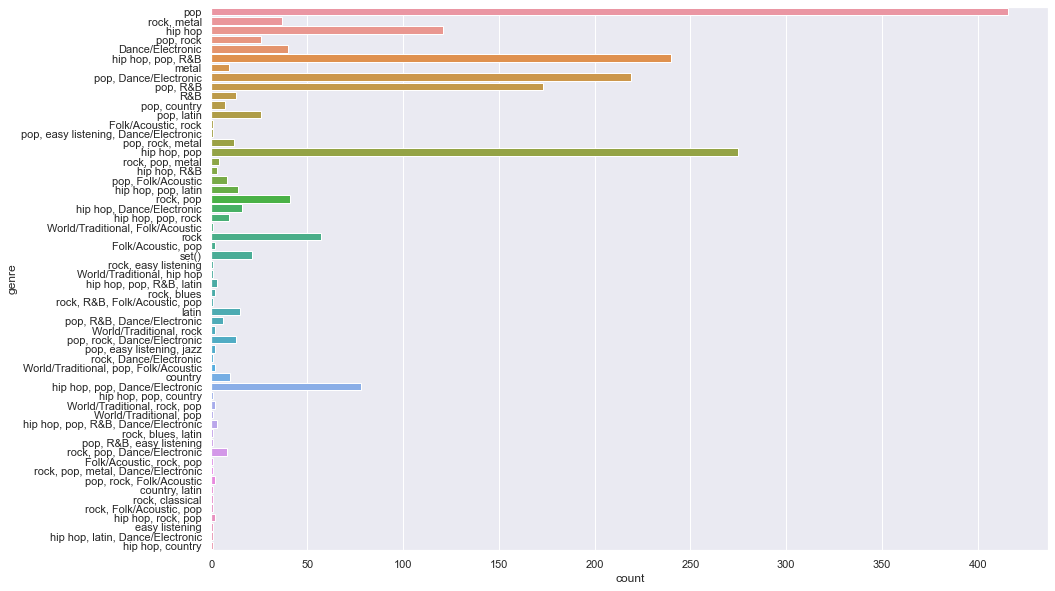

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(y = "genre", data=df)
plt.show()

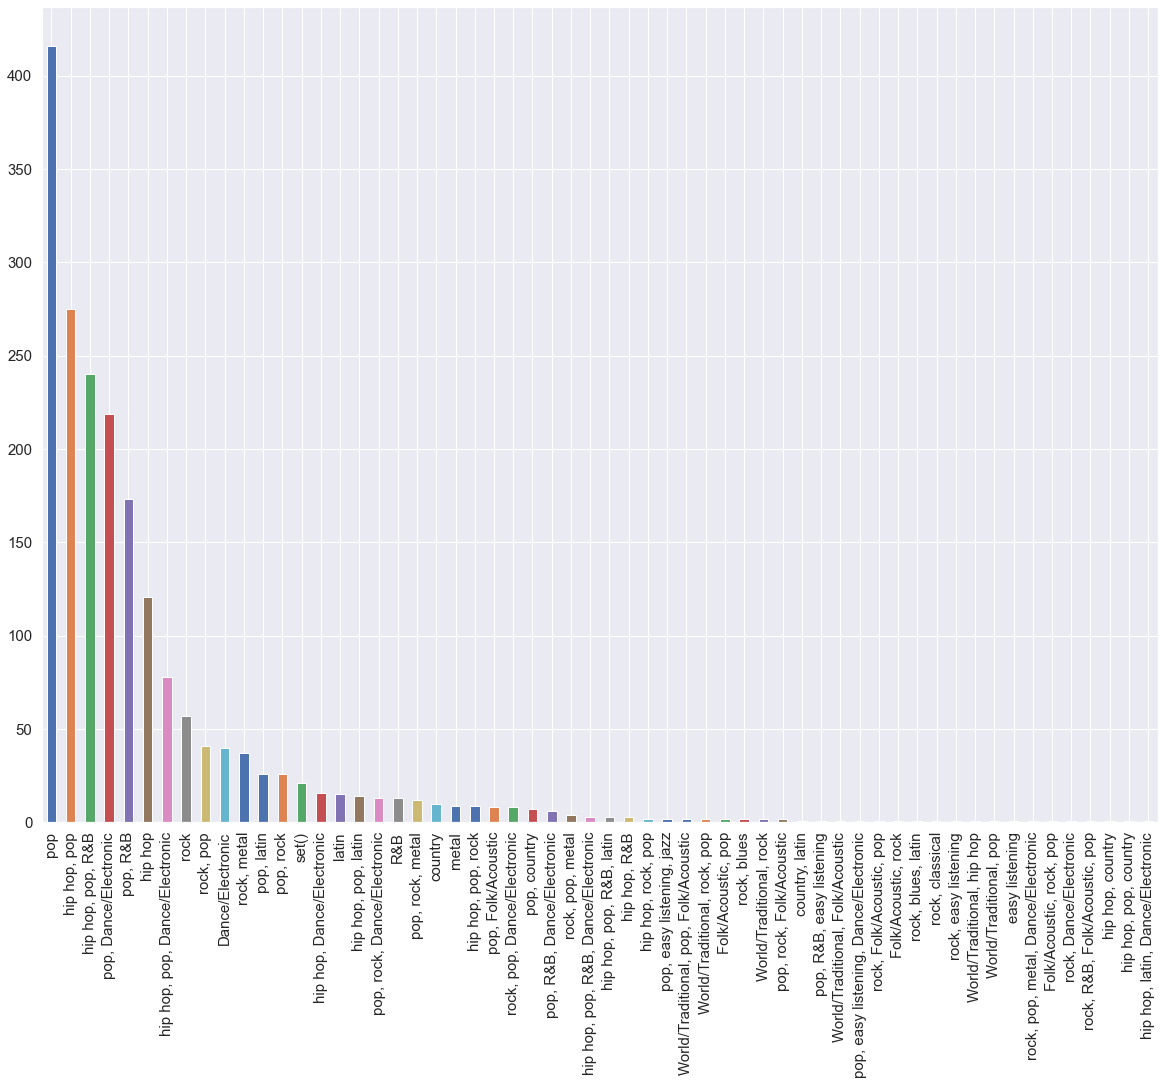

In [15]:
plt.figure(figsize=(20,15))
df["genre"].value_counts().plot.bar(fontsize=15)
plt.show()

#### **The Most Popular Genres**

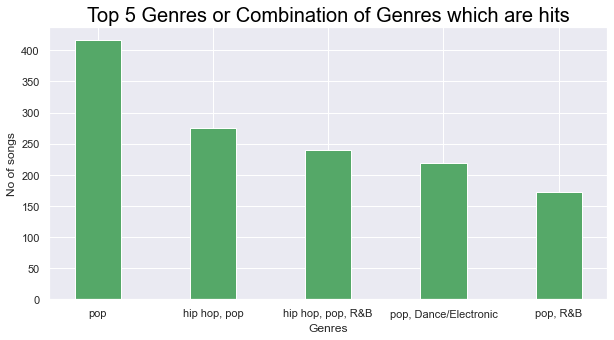

In [16]:
genre = df["genre"].value_counts()
tp_genres=genre[:5]
tp_genres_names=genre[:5].index
fig = plt.figure(figsize = (10, 5))
plt.bar(tp_genres_names,tp_genres,width = 0.4,color='g')
plt.xlabel("Genres")
plt.ylabel("No of songs")
plt.title('Top 5 Genres or Combination of Genres which are hits',color = 'black',fontsize = 20)
plt.show()

- As I expected, pop is the most popular type of genre from 2000-2019
- Hip hop, R&B and Dance/Electronic are also in the most listened genres

### **Artist**

In [17]:
df["artist"].value_counts()

Rihanna                  25
Drake                    23
Eminem                   21
Calvin Harris            20
David Guetta             18
Britney Spears           18
Kanye West               17
Chris Brown              17
Taylor Swift             16
Beyoncé                  16
Katy Perry               16
P!nk                     15
Black Eyed Peas          14
Ariana Grande            14
Coldplay                 13
Jason Derulo             13
Maroon 5                 13
Justin Timberlake        12
Bruno Mars               12
Nelly                    11
Lady Gaga                11
JAY-Z                    11
Flo Rida                 11
Usher                    11
Avicii                   10
Jennifer Lopez           10
Avril Lavigne            10
Justin Bieber            10
Nickelback                9
Ludacris                  9
                         ..
Roger Sanchez             1
Lil Baby                  1
Papa Roach                1
Disturbing Tha Peace      1
Regard              

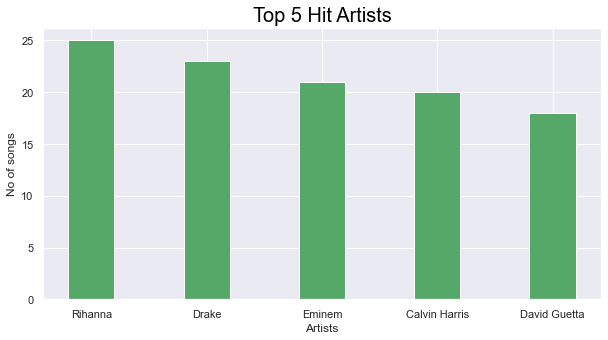

In [18]:
artist = df["artist"].value_counts()
tp_artist=artist[:5]
tp_artist_names=artist[:5].index
plt.figure(figsize = (10, 5))
plt.bar(tp_artist_names,tp_artist,width = 0.4,color='g')
plt.xlabel("Artists")
plt.ylabel("No of songs")
plt.title('Top 5 Hit Artists',color = 'black',fontsize = 20)
plt.show()

## **Numeric Variables**

In [19]:
n_v = df.dtypes != "object"
print(list(n_v[n_v].index))

['duration_ms', 'explicit', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


#### **Let's look at the average duration of hit songs for each year**

In [20]:
# Converting the duration of songs from milliseconds to minutes and seconds
def time_convert(ms):
    sec = ms/1000
    return f"{int(sec//60)}.{int(sec%60)}"
    
durations = df[["year","duration_ms"]].groupby("year").mean().reset_index().iloc[0:20]
durations["min"] = durations["duration_ms"].apply(time_convert)
durations["min"] = durations["min"].astype(float)
durations

,year,duration_ms,min
0,2000,249993.067568,4.90
1,2001,242450.064815,4.20
2,2002,253549.077778,4.13
3,2003,236334.639175,3.56
4,2004,234039.843750,3.54
5,2005,236514.288462,3.56
6,2006,238148.400000,3.58
7,2007,231749.904255,3.51
8,2008,235675.247423,3.55
9,2009,236082.059524,3.56


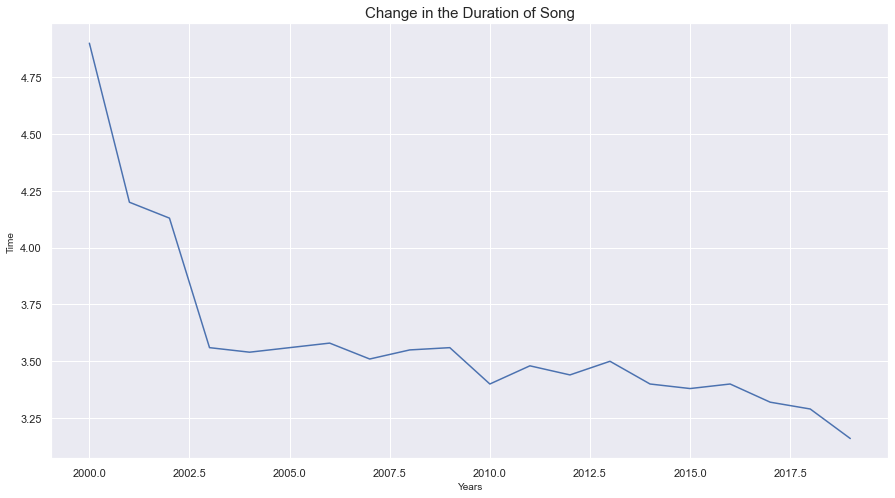

In [21]:
x = durations["year"]
y = durations["min"]
plt.figure(figsize = (15, 8))
sns.lineplot(x,y, data=durations)
plt.title('Change in the Duration of Song',fontsize=15)
plt.xlabel('Years',size=10)
plt.ylabel('Time',size=10)
plt.show()

#### **The most popular artists:**

In [22]:
pop_artists = df[["artist","popularity"]].groupby("artist").sum().sort_values("popularity", ascending=False).reset_index().head(10)
pop_artists

,artist,popularity
0,Rihanna,1803
1,Eminem,1519
2,Drake,1424
3,Calvin Harris,1356
4,David Guetta,1185
5,Britney Spears,1140
6,Taylor Swift,1125
7,Chris Brown,1080
8,Kanye West,1049
9,Katy Perry,1033


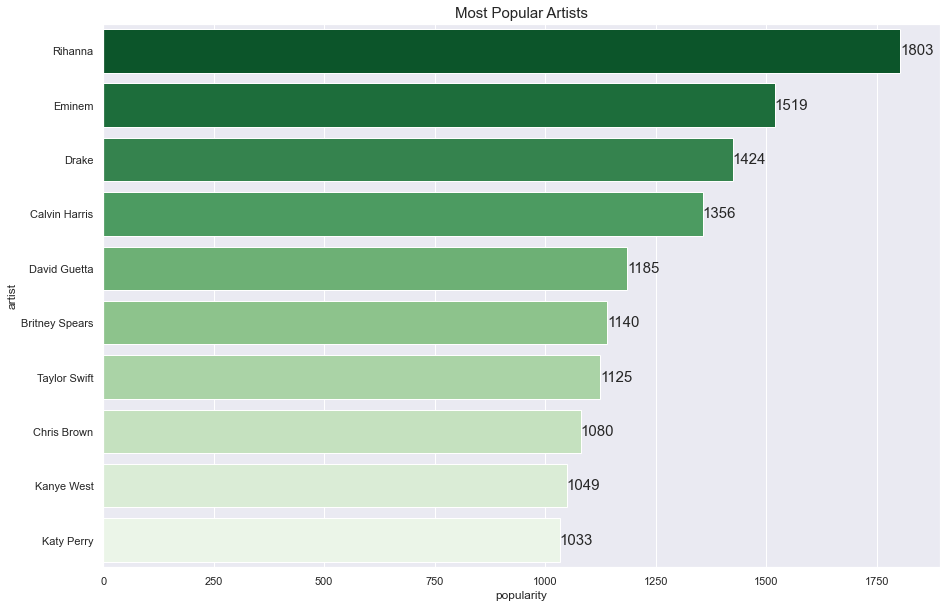

In [23]:
plt.figure(figsize=(15,10))
plt.title("Most Popular Artists",fontsize=15)
plot = sns.barplot(x=pop_artists["popularity"],y=pop_artists["artist"],data=pop_artists,palette="Greens_r")
plot.bar_label(plot.containers[0],size = 15)
plt.show()

- We can say that there is a direct proportion between the number of songs and popularity.

## **Multivariate Variable Analysis:**

### **Key and Mode:**
- **Key**:The key the track is in. Integers map to pitches using standard Pitch Class notation.
- **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

In [24]:
key_mode = df.groupby(['key','mode']).size().unstack(fill_value = 0).reset_index()
key_mode.rename(columns = {0:"minor",1:"major"}, inplace=True)
key_mode.key.replace({0:'C',1:'C♯/D♭',2:'D',3:'E♭/D♯',4:'E',5:'F',6:'F♯/G♭',7:'G',8:'A♭/G♯',9:'A',10:'B♭/A♯',11:'B'}, inplace=True)
key_mode

mode,key,minor,major
0,C,65,128
1,C♯/D♭,91,168
2,D,32,123
3,E♭/D♯,31,27
4,E,76,48
5,F,111,67
6,F♯/G♭,79,73
7,G,56,139
8,A♭/G♯,57,112
9,A,71,84


<AxesSubplot:title={'center':'Distribution of songs in the top hits from 2000-2019 according to major and minor keys'}, xlabel='key'>

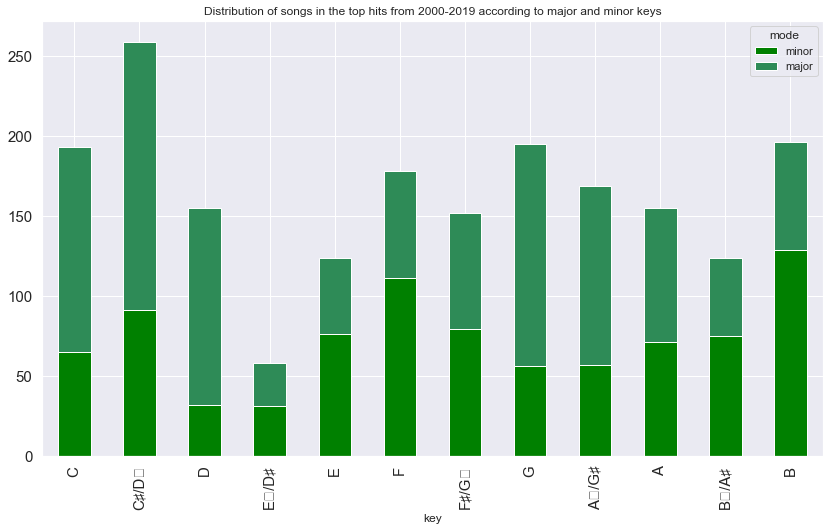

In [25]:
key_mode.plot.bar(x='key',stacked=True,color=['green','seagreen'],
              title="Distribution of songs in the top hits from 2000-2019 according to major and minor keys",
              figsize=(14,8),fontsize=15)

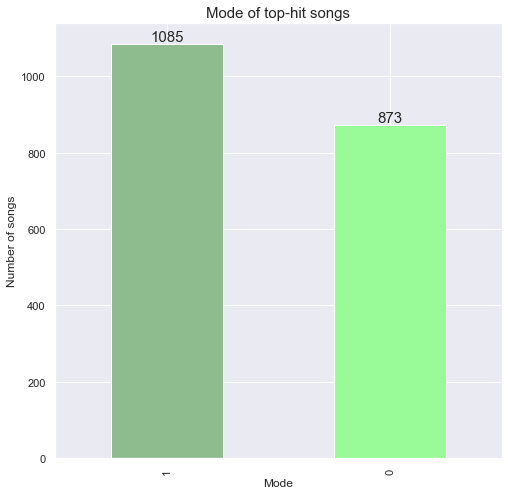

In [26]:
data=df['mode'].value_counts()
plt.figure(figsize=(8,8))
plt.title("Mode of top-hit songs",fontsize=15)
plt.ylabel("Number of songs")
plt.xlabel("Mode")
c1=data.plot(kind='bar',color=['darkseagreen', 'palegreen'])
c1.bar_label(c1.containers[0],size = 15)
plt.show()

- Thus we can conclude from the given analysis that **C♯/D♭** is key for majority of the top-hits between the period 2000-2019 and most of the top-hits are on **major scale**

#### **Popular songs which are explicit:**

Explicit Is True = 540
Explicit Is False = 1418


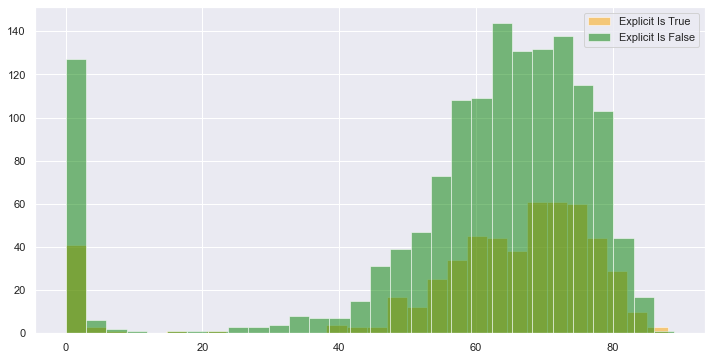

In [27]:
print ('Explicit Is True =',(df[df['explicit']==True]['popularity']).count())
print ('Explicit Is False =',(df[df['explicit']==False]['popularity']).count())
plt.figure(figsize=(12,6))
df[df['explicit']==True]['popularity'].hist(bins=30, color='orange',alpha=0.5,
                                                        label='Explicit Is True')
df[df['explicit']==False]['popularity'].hist(bins=30, color='green',alpha=0.5,
                                                        label='Explicit Is False')
plt.legend()

In [28]:
# Creating a new dataframe to make the correlation matrix
df_num = df[['duration_ms', 'year', 'popularity', 'danceability', 'energy', 
     'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

Text(0.5, 1.0, 'Correlation Matrix')

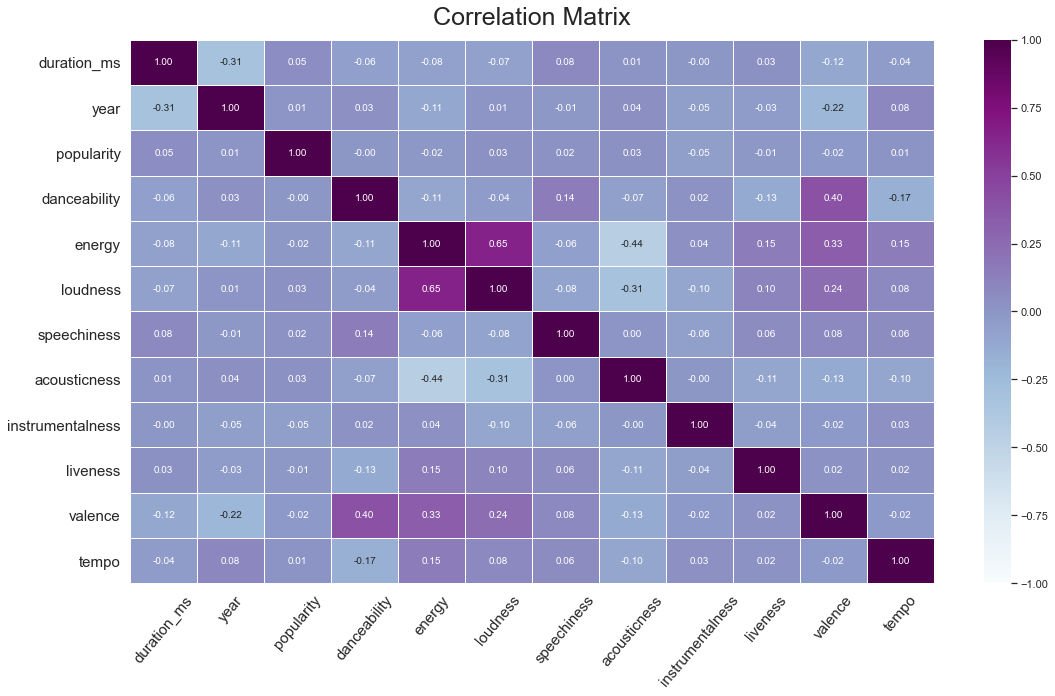

In [29]:
plt.figure(figsize=(18,10))
heatmap = sns.heatmap(df_num.corr(),vmin=-1,vmax=1, annot=True, fmt=".2f",cmap = "BuPu",linewidths = .5)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
heatmap.set_title("Correlation Matrix", fontdict={"fontsize" : 25}, pad=15)

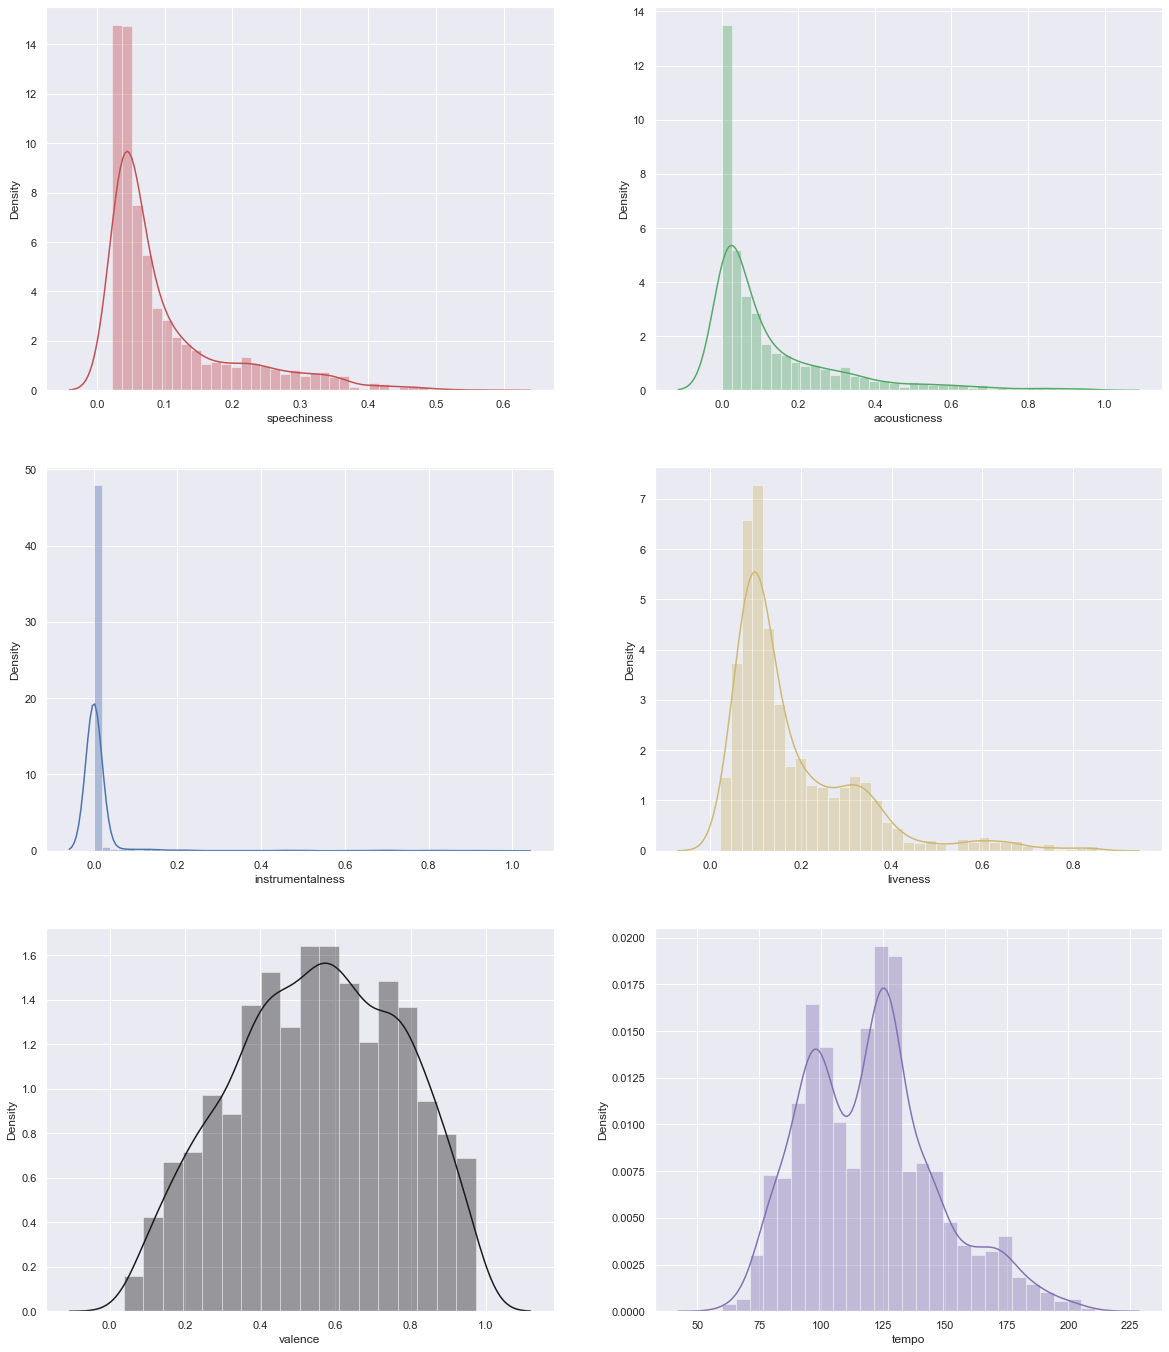

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(20,24))
Speechiness= df['speechiness'].dropna()
sns.distplot(Speechiness,color='r',ax=ax[0][0])

Acousticness= df['acousticness'].dropna()
sns.distplot(Acousticness,color='g',ax=ax[0][1])

Instrumentalness = df['instrumentalness'].dropna()
sns.distplot(Instrumentalness,color='b',ax=ax[1][0])

Liveness= df['liveness'].dropna()
sns.distplot(Liveness,color='y',ax=ax[1][1])

Valence= df['valence'].dropna()
sns.distplot(Valence,color='k',ax=ax[2][0])

tempo= df['tempo'].dropna()
sns.distplot(tempo,color='m',ax=ax[2][1])


plt.show()

- From the above analysis we can suggest that:
    *    The danceability and energy on average for the top-hits are generally high , indicating that these songs are high on intensity.<br>
    *    The loudness of the top-hits are also high compared to the rest of the songs.<br>
    *    Speechiness of top-hits are quite low.
    *    Instrumentalness of songs are also low , which gives a pretty clear idea as to how music-taste has evolved among listeners. The late 20th century was   dominated by the bands as the years progressed we got to witness a decline in the number of bands being popular and thus instrumentalness also declined over the years expect few.
    *    Acousticness of tracks are also low , suggesting that songs which tend to become top-hits are high in energy and tempo.
    *    Songs which become top-hits score low on liveness indicating the songs are mostly recorded.
    *    Top-hits on average score just above 0.5 on valence indicating that while most top-hits have a positive mood associated with them , still top-hits have quite a equal mixture of both positive and sad sounding associated with them.
    *  Last but not the least the tempo for most of the top-hits on average is 120bpm suggesting that songs which are peppy and fast sounding.   

# **Conclusion:**

### **From the above analysis we can infer the following:**
-   The **duration of top-hits** have been **decreasing** with each passing year. The average song duration is 3 min and 48 sec long.
-   Songs which tend to become top-hits have **low explicity**.
-   **Rihanna** , **Emimem** , **Drake** , **Calvin Harris** , **David Guetta** are the most popular artists.
-   Top-hits generally had
    -  **high danceability levels** ,
    -  **fast paced tempo** 
    -  **low acousticness** 
    -  **instrumentalness** and were generally **recorded**.
-   Songs which tend to be top-hits over this period mostly belonged to the genre **'Pop'**.
-   **C♯/D♭** is **key** for majority of the top-hits in this period and most of the top-hits are on **major scale**.